# Part I - Ford GoBike System Dataset Exploration

## by Ghadah Alabduljabbar

## Table of Contents
- [Introduction](#intro)
- [Part I - Preliminary Wrangling](#pw)
- [Part II - Univariate Exploration](#ue)
- [Part III - Bivariate Exploration](#be)
- [Part IV - Multivariate Exploration](#me)
- [Part V - Conclusions](#cn)


<a id='intro'></a>
## Introduction
> This dataset is taken from Ford GoBike a  public bicycle sharing system in California, the data contained information about GoBike members and all trips that were taken by them in February 2019.

<a id='pw'></a>
## Preliminary Wrangling


In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# read the data from .csv file
Fdf = pd.read_csv('201902-fordgobike-tripdata.csv')
Fdf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
Fdf.shape

(183412, 16)

In [4]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
Fdf.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
sum(Fdf.duplicated())

0

In [7]:
Fdf.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
# summery about the categorical variables
Fdf.describe(include=['O'])

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,183412,183412,183215,183215,183412,175147,183412
unique,183401,183397,329,329,2,3,2
top,2019-02-25 08:52:07.5820,2019-02-11 08:03:22.6020,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,2,3904,4857,163544,130651,166053


### What is the structure of your dataset?

The data has 183412 rows and 16 columns.

There are a few missing values in start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender columns, and since we don’t have any additional resources to fill these missing values, and the fact that they are very few compare to the large data we have, we decided to remove them.



In [9]:
# make copy of the data to do the cleaning process
df = Fdf.copy()
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [10]:
# move all missing values
df = df.dropna()
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
df.shape

(174952, 16)

Seeing some of the columns, we decided to extract the day from start_time since the month and year data is repeated, also we will calculate the member age from member_birth_year

Lastly after the process we did there are some unnecessary columns which will be deleted.

In [12]:
# convert the duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60
df['duration_min'] = df['duration_min'].astype(int)

In [13]:
# create period column from the start date
df['trip_time'] = pd.to_datetime(df['start_time']).dt.hour
df['trip_day'] = pd.to_datetime(df['start_time']).dt.day_name()
df['trip_period'] =  df.apply(lambda row: 
                                 'Morning' if (row['trip_time'] < 12) 
                                  else ('Afternoon' if row['trip_time'] >= 12 and row['trip_time'] <=16
                                  else 'Night'), axis=1)
df['member_age'] = pd.datetime.today().year - df['member_birth_year'].astype(int)
df.drop(columns=['start_time','member_birth_year', 'duration_sec'], inplace=True)
df.head(1)

,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,trip_time,trip_day,trip_period,member_age
0,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,869,17,Thursday,Night,38


In [14]:
df.shape

(174952, 18)

The cleaned and processed data has 174952 rows and 18 columns.

In [15]:
# save the clean data
df.to_csv('fordgobike_clean.csv', index=False)

### What is/are the main feature(s) of interest in your dataset?
We are intrested to know about the trends in GoBike custmers behaviour to be able to improve the business. So our main question is:
Q: what are the features of the most trips taken in terms of duration, time period of day, day of the week, and members characteristics such as gender, type, and age?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In order to answer our question we will use these features duration_min, user_type, member_gender, trip_day, trip_period, member_age as we believe it will help our investigation.

<a id='ue'></a>
## Univariate Exploration
In this section, we will explore each variable separately to check the distribution, and the presence of unusual points or outliers.

#### - Trip Duration

In [16]:
df['duration_min'].describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

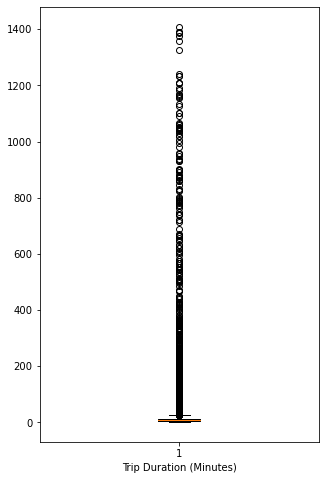

In [17]:
plt.figure(figsize=[5,8])   
plt.boxplot(df['duration_min'])
plt.xlabel('Trip Duration (Minutes)');

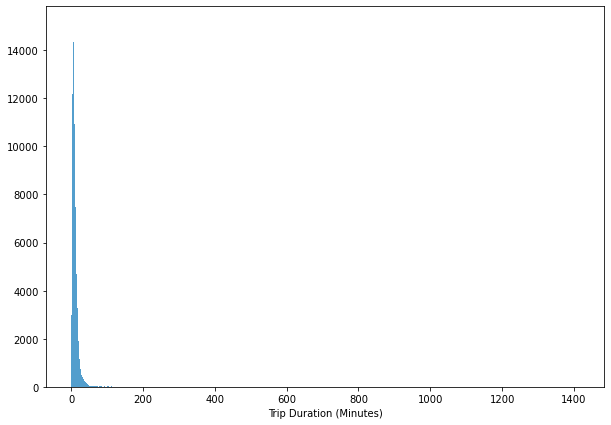

In [18]:
plt.figure(figsize=[10,7])
plt.xlabel('Trip Duration (Minutes)')
# specifying the number of bins in the histgram 
bins = np.arange(df['duration_min'].min(), df['duration_min'].max()+5, 1)
plt.hist(data = df, x = 'duration_min', bins=bins, color = sns.color_palette('Blues')[3]);

From the boxplot above we can see there are outliers in the data, and seeing the histogram the data is highly skewed to the right. 

In [19]:
df['duration_min'].describe(percentiles=[.99])

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
50%           8.000000
99%          52.000000
max        1409.000000
Name: duration_min, dtype: float64

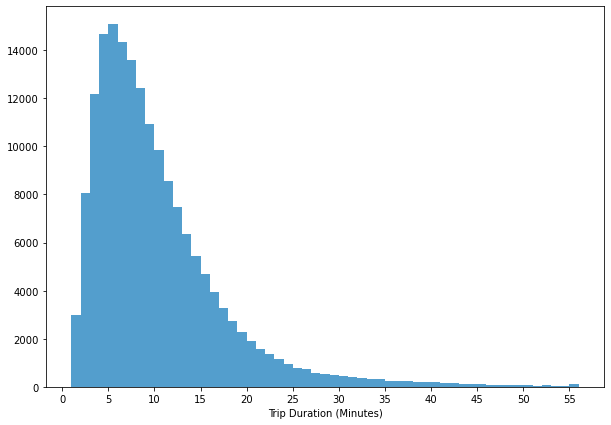

In [20]:
plt.figure(figsize=[10,7])
plt.xlabel('Trip Duration (Minutes)')
bins = np.arange(df['duration_min'].min(), df['duration_min'].quantile(0.99)+5, 1)
#  specifying the ticks gaps
plt.xticks(np.arange(0, 60, 5), np.arange(0, 60, 5));
plt.hist(data = df, x = 'duration_min', bins=bins, color = sns.color_palette('Blues')[3]);

99% of the data has a duration less than 52 minutes, so focusing on the 99% of the data we can see in the plot above  members’ bike trips usually take from 4 minutes to 10 minutes, and it’s rare they take more than 30 minutes.

#### - Trip Day of The week

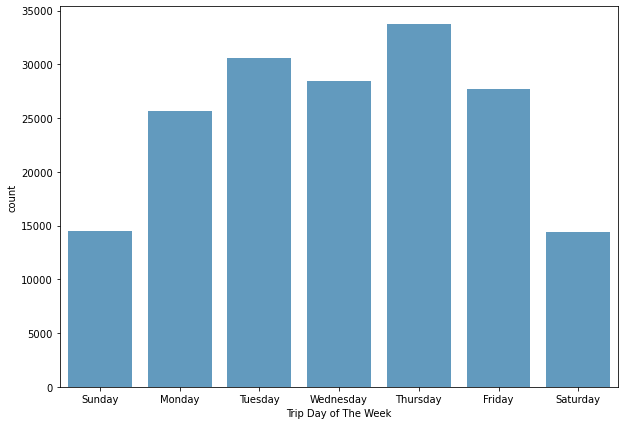

In [21]:
plt.figure(figsize=[10,7])
sns.countplot(data=df, x='trip_day', color = sns.color_palette('Blues')[3],
              order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Trip Day of The Week');

From the plot above we can see that members usually take a bike trip on Tuesday and Thursday, while Sunday and Saturday have fewer tripes compared tp other days.

#### - Members Type

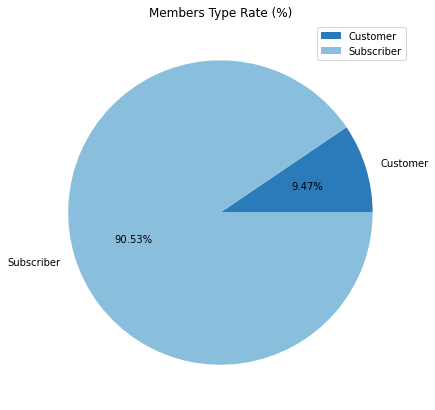

In [22]:
df.groupby(['user_type']).count().plot(kind='pie', labels=['Customer', 'Subscriber'], y='end_time',
                                    title="Members Type Rate (%)", autopct='%.2f%%', 
                                    colors = [sns.color_palette('Blues')[4], sns.color_palette('Blues')[2]], 
                                       label="", figsize=(10, 7));

From the plot above we can see that a high percentage of GoBike members **90.53%** are Subscribers while only **9.47%** are Customers.

#### - Members Gender

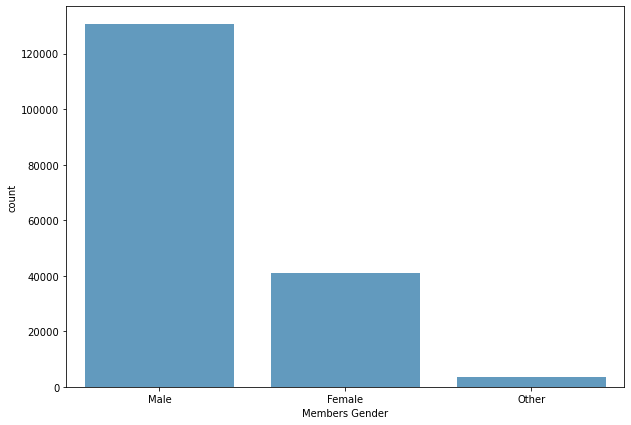

In [23]:
plt.figure(figsize=[10,7])
sns.countplot(data=df, x='member_gender', order= df['member_gender'].value_counts().index, 
              color = sns.color_palette('Blues')[3])
plt.xlabel('Members Gender');

From the plot above we can see that the majority of GoBike members are Male, and the difference between the number of Male and Female is big.

#### - Bike Share For All Trip

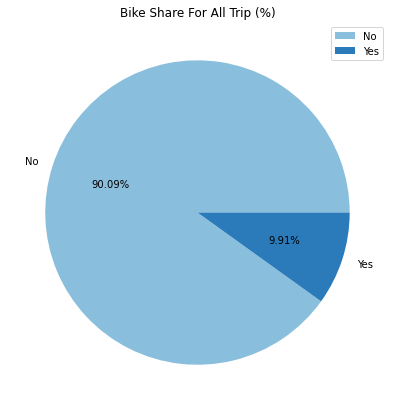

In [24]:
df.groupby(['bike_share_for_all_trip']).count().plot(kind='pie', labels=['No', 'Yes'], y='end_time',
                                    title="Bike Share For All Trip (%)", autopct='%.2f%%', 
                                    colors = [sns.color_palette('Blues')[2], sns.color_palette('Blues')[4]], 
                                       label="", figsize=(10, 7));

From the plot above we can see that a high percentage of GoBike members **90.09%** don't use GoBike share for their entire trip, while only **9.91%** are using it for their entire trip.

#### - Trip Period of The Day

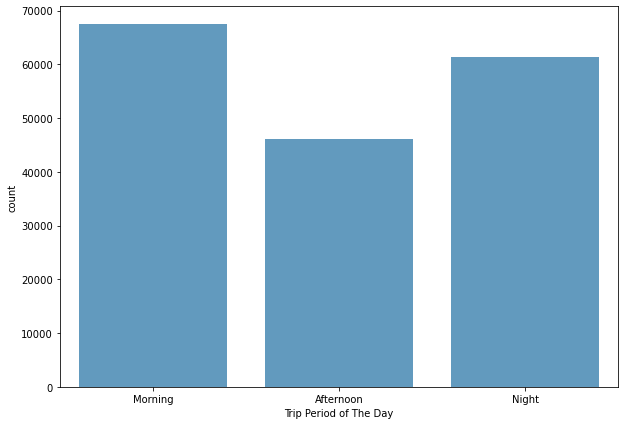

In [25]:
plt.figure(figsize=[10,7])
sns.countplot(data=df, x='trip_period', order=['Morning', 'Afternoon', 'Night'], 
              color = sns.color_palette('Blues')[3])
plt.xlabel('Trip Period of The Day');

From the plot above we can see that members usually take bike tripes in the Morning and at Night, and sometimes they take it in the Afternoon.

#### - Member Age

In [26]:
df['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

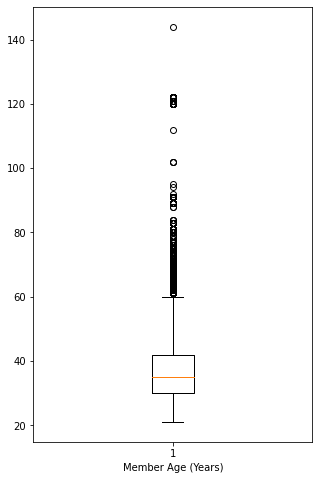

In [27]:
plt.figure(figsize=[5,8])   
plt.boxplot(df['member_age'])
plt.xlabel('Member Age (Years)');

From the boxplot above we can see there are outliers in the data, there are a few records where members age is higher than 80.

In [28]:
df['member_age'].describe(percentiles=[.99])

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
50%          35.000000
99%          67.000000
max         144.000000
Name: member_age, dtype: float64

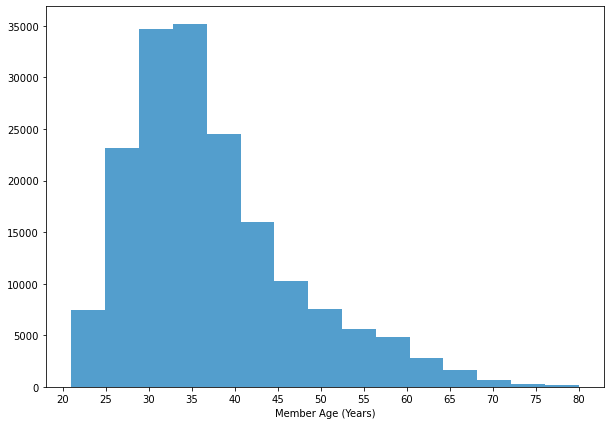

In [29]:
plt.figure(figsize=[10,7])
plt.xlabel('Member Age (Years)')
plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5));
plt.hist(data = df[df['member_age'] <= 80], x = 'member_age', bins=15, color = sns.color_palette('Blues')[3]);

99% of the members have an age less than 67 years, so we excluded all ages higher than 80 years and we can see in the plot above the majority of GoBike members are adults who have age from 25 to 40 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For the distribution, trip duration was usually quick and short less than half an hour (4-10 minutes), although there were some trips than lasted almost 24 hours which was very rare. Thursday was the day that has the most trips, as for the time Morning was the peaked period. GoBike members are mostly subscribers, also Male riders are the majority of the users, as for users age most of them have an age from 25 to 40 years old, although there were some users who are older than 80 years old which is unusual, also the majority of the users didn’t use the system for the entire trip. Checking all data no transformation was needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For the trip duration, since there were some outliers, we focused on 99% of the data which has a duration less than 52 minutes, while the maximum was 1409 minutes. 

For the member's age, since there were some outliers when age higher than 80 years old, we focused on data where age is less than or equale 80.

<a id='be'></a>
## Bivariate Exploration
In this section, we will explore the relationships between pairs of variables.

In [30]:
def display_pointplot(xlabel, ylabel, x, y, s, h):
    """This function will take pointplot parameters and draw the plot
    """
    plt.figure(figsize=[10,7])
    sns.pointplot(data=df, x=x, y=y, ci=None, hue=h, palette='Blues', scale = s, linestyles="");
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

#### - Trip Duration and Members Age

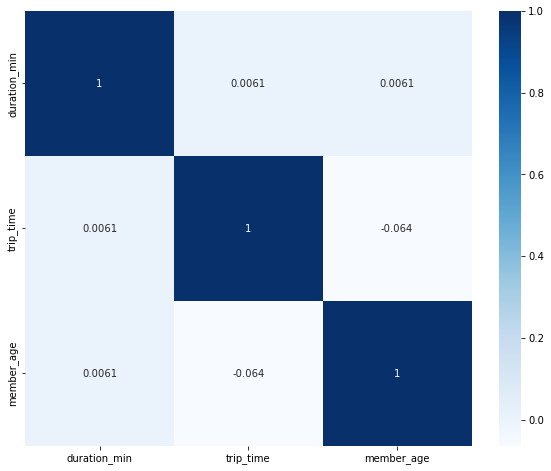

In [31]:
df_cor = df[['end_time','duration_min', 'trip_time','member_age']].copy()
plt.figure(figsize = (10,8)) 
sns.heatmap(df_cor.corr(), annot=True, cmap="Blues");

From the plot above we can see there is no correlation between Trip uration and Members Age.

#### - Period of The Day and Day of the Week

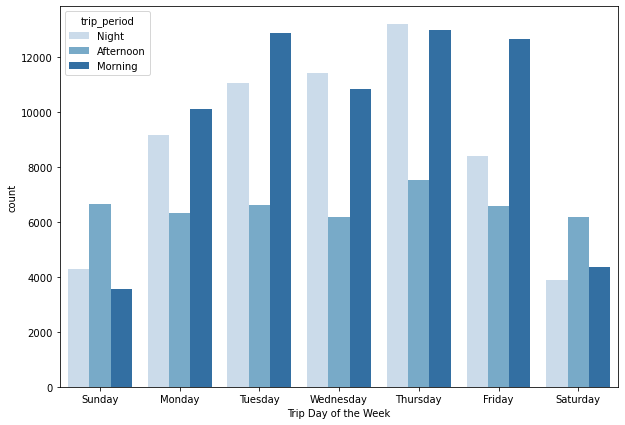

In [32]:
plt.figure(figsize=[10,7])
sns.countplot(data=df, x='trip_day', hue='trip_period',  palette='Blues', 
              order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Trip Day of the Week');

From the plot above we can see some interesting information, we know that Tuesday and Thursday are the peaked days, and now we can see in Tuesday highest number of users go on a bike trip in the morning while on Thursday they slightly prefer going at night, while Sunday and Saturday have the least number of trips, users in those days prefer to go on a trip on the afternoon, and that probably because it’s the weekend.

#### - Member Gender and Period of The Day

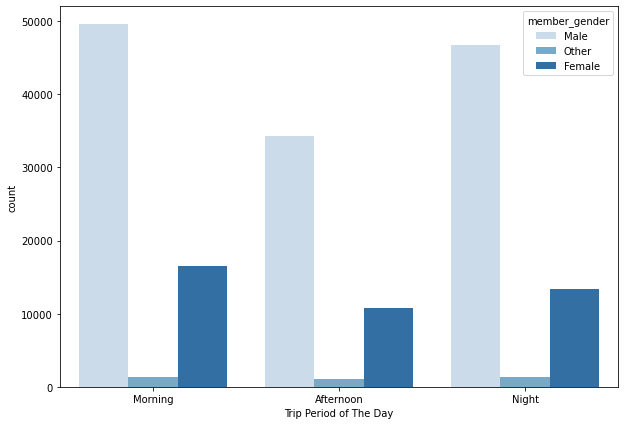

In [33]:
plt.figure(figsize=[10,7])
sns.countplot(data=df, x='trip_period', hue='member_gender', order=['Morning', 'Afternoon', 'Night'], 
              palette='Blues')
plt.xlabel('Trip Period of The Day');

From the plot above we can see that female and male members do prefer to go on bike trips in the morning or night more than in the Afternoon.

#### - Trip Duration and User Type

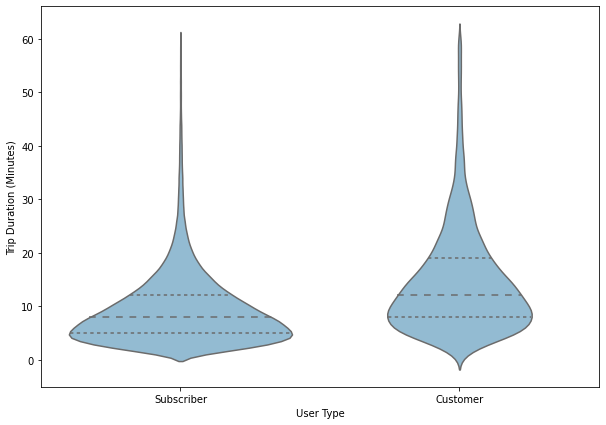

In [34]:
plt.figure(figsize=[10,7])
sns.violinplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min', 
               color = sns.color_palette('Blues')[2], inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Minutes)');

From the plot above we can see that Subscribers tend to have shorter trips compared to casual customers, and it's interesting since being a subscriber means using the service more frequently than casual customers and this probably leads to short and quick bike trips.

#### - Trip Duration and Member Gender

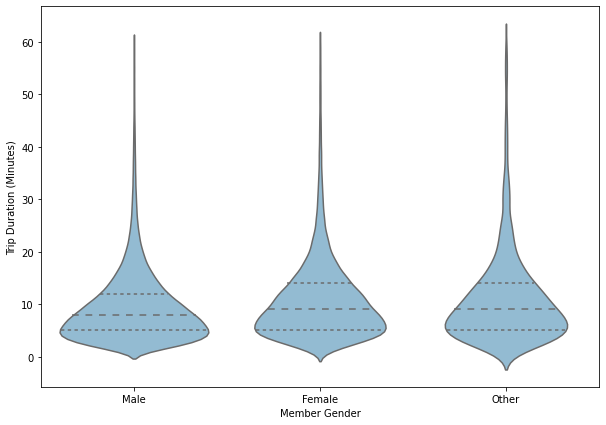

In [35]:
plt.figure(figsize=[10,7])
sns.violinplot(data=df[df['duration_min'] <= 60], x='member_gender', y='duration_min', 
               color = sns.color_palette('Blues')[2], inner='quartile');
plt.xlabel('Member Gender');
plt.ylabel('Trip Duration (Minutes)');

From the plot above we can see that male members tend to have shorter and quicker trips than female members.

#### - Member Age and Member Gender

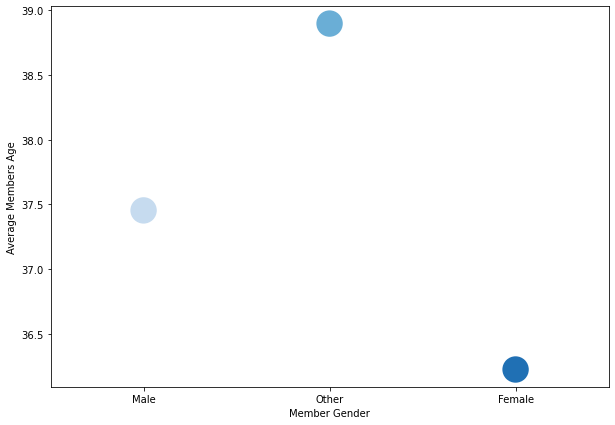

In [36]:
display_pointplot('Member Gender', 'Average Members Age', 'member_gender', 'member_age', 3, None);

From the plot above we can see that on average female members are younger (age less than 36 years old), while male members are older (above 37 years old).

#### - Trip Duration and  Day of the Week

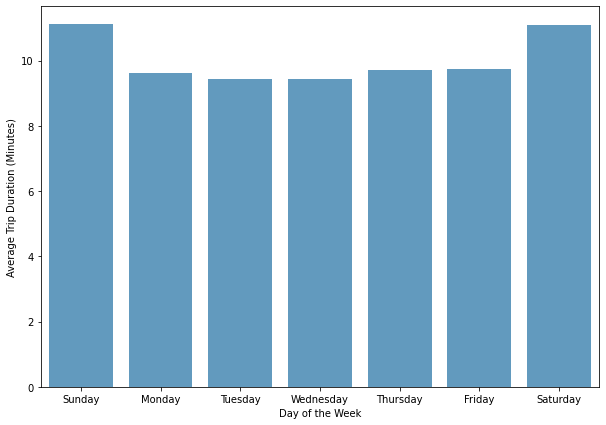

In [37]:
plt.figure(figsize=[10,7])
sns.barplot(y='duration_min', x='trip_day',data=df[df['duration_min'] <= 60], ci=None,
            color = sns.color_palette('Blues')[3],  
            order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)');

From the plot above we can see that on average Weekends (Sunday and Saturday) have longer tripes compared to other days, and that is probably because it’s the weekend and people have more free time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more male users who use the system than female users, male users are older and take shorter trips than female users, in most days only a few users use the system in the afternoon except for the weekends users tend to go on longer trips in the afternoon, also even if the majority of system users are subscribers, customers do take a longer trip, while subscribers tend to have short and quicker trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The day does have an interesting effect on 2 features, as I found 2 patterns: the period of the day and the trip duration.

<a id='me'></a>
## Multivariate Exploration

In this section, we will explore the relationships between three or more variables.


#### - Average Trip Duration based on Trip Period and Member Gender 

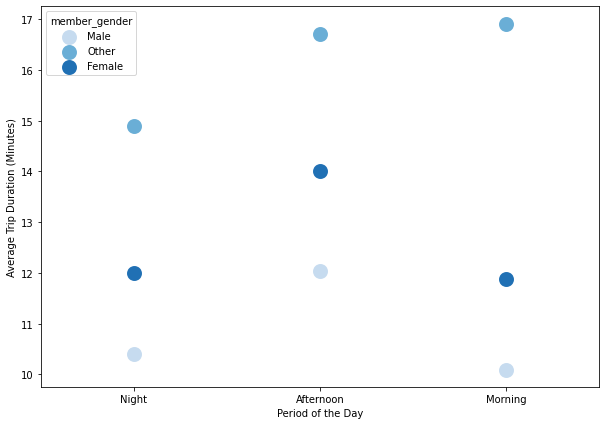

In [38]:
display_pointplot('Period of the Day', 'Average Trip Duration (Minutes)', 'trip_period', 
                  'duration_min', 1.7, 'member_gender' );

From the plot above we can see that on average female and male users who go on a trip in the afternoon tend to have a longer duration than female and male users who goes on a trip in the morning or at the night.

#### - Average Member Age based on Trip Period and Member Gender 

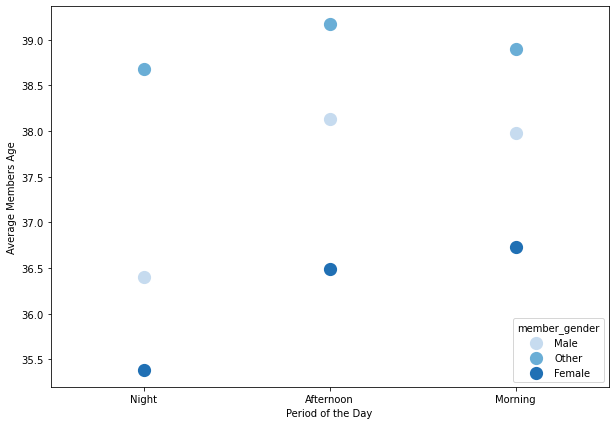

In [39]:
display_pointplot('Period of the Day', 'Average Members Age', 'trip_period', 
                  'member_age', 1.5, 'member_gender' );

From the plot above we can see that on average older users of all genders tend to take trips in the afternoon, while younger users tend to go at night.

#### - Average Trip Duration based on Trip Day and User Type 

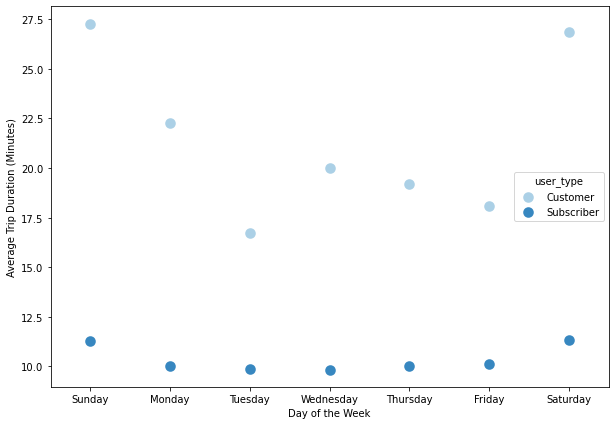

In [40]:
plt.figure(figsize=[10,7])
sns.pointplot(data=df, x='trip_day', y='duration_min', hue='user_type', linestyles="", ci=None, 
              scale=1.2, palette='Blues',
              order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
plt.xlabel('Day of the Week');
plt.ylabel('Average Trip Duration (Minutes)');

From the plot above we can see that on average users both Subscribers and Customers have longer trips on the weekends (Sunday and Saturday), but on work days Subscribers tend to have the quickest trips on Wednesday while Customers have the shortest trips on Tuesday.

#### - Average Member Age based on Trip Day and User Type

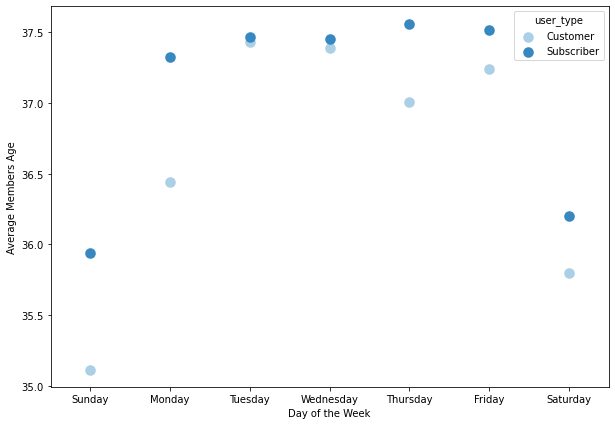

In [41]:
plt.figure(figsize=[10,7])
sns.pointplot(data=df, x='trip_day', y='member_age', hue='user_type', linestyles="", ci=None, 
              scale=1.2, palette='Blues', 
              order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
plt.xlabel('Day of the Week');
plt.ylabel('Average Members Age');

From the plot above we can see that on average younger users both Subscribers and Customers choose to go on trips on the weekends while older users choose workdays for their trips, moreover in general Subscribers are older than Customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The bivariate and univariate explorations made a lot of patterns clear and multivariate exploration sport most of them, trips in the afternoon are longer and usually taken by older users, while younger users take shorter trips in the morning or at the night, also trips in the weekends are longer and usually taken by younger people.

### Were there any interesting or surprising interactions between features?

since the features are not huge and straightforward most of the patterns were discovered in previous sections (bivariate and univariate explorations), and the multivariate exploration supported them, so there was no surprising interaction in this section.


<a id='cn'></a>
## Conclusions

At the end of performing all these exploration steps, we found a lot of useful information that can open a lot of future opportunities to improve and promote the business, and summary of the findings:
- Members’ bike trips usually take from 4 minutes to 10 minutes, and it’s rare they take more than 30 minutes.
- Members usually take a bike trip on Tuesday and Thursday, while Sunday and Saturday have fewer trips compared to other days.
- GoBike members 90.53% are Subscribers while only 9.47% are Customers.
- The majority of GoBike members are Male, and the difference between the number of Male and Female is big.
- High percentage of GoBike members 90.09% don't use GoBike share for their entire trip, while only 9.91% are using it for their entire trip.
- Members usually take bike trips in the Morning and at Night, and sometimes they take it in the Afternoon.
- The majority of GoBike members are adults who have age from 25 to 40 years old.
- On Tuesday highest number of users go on a bike trip in the morning while on Thursday they slightly prefer going at night, while Sunday and Saturday have the least number of trips, users on those days prefer to go on a trip in the afternoon.
- Female and male members do prefer to go on bike trips in the morning or night more than in the Afternoon.
- Subscribers tend to have shorter trips compared to casual customers.
- Male members tend to have shorter and quicker trips than female members.
- On average female members are younger (age less than 36 years old), while male members are older (above 37 years old).
- On average Weekends (Sunday and Saturday) have longer trips compared to other days, and that is probably because it’s the weekend and people have more free time.